# Basic Classification Overview

In the following notebook we'll introduce few basic classification methods on the "Iris" dataset.

##  0. Imports & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
iris_dataset = load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['target'] = pd.Series(iris_dataset.target)
df['class'] = df['target'].apply(lambda x: iris_dataset.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


##  1. EDA

First, we should understand our dataset.  
By make some visualizations, we may be able to find patterns in the data.

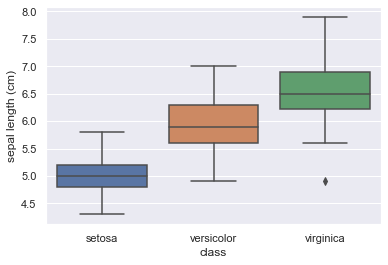

In [3]:
sns.boxplot(x='class', y='sepal length (cm)', data=df)

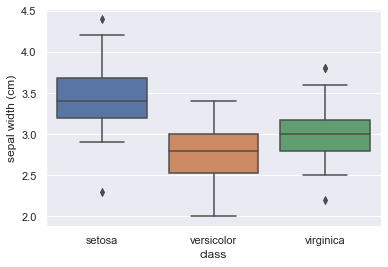

In [4]:
sns.boxplot(x='class', y='sepal width (cm)', data=df)

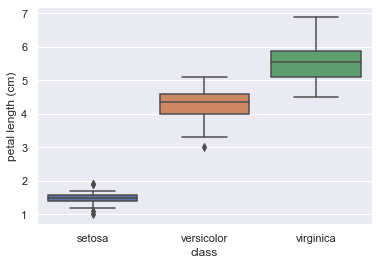

In [5]:
sns.boxplot(x='class', y='petal length (cm)', data=df)

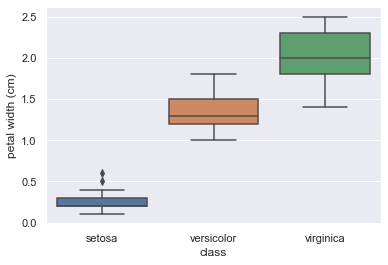

In [6]:
sns.boxplot(x='class', y='petal width (cm)', data=df)

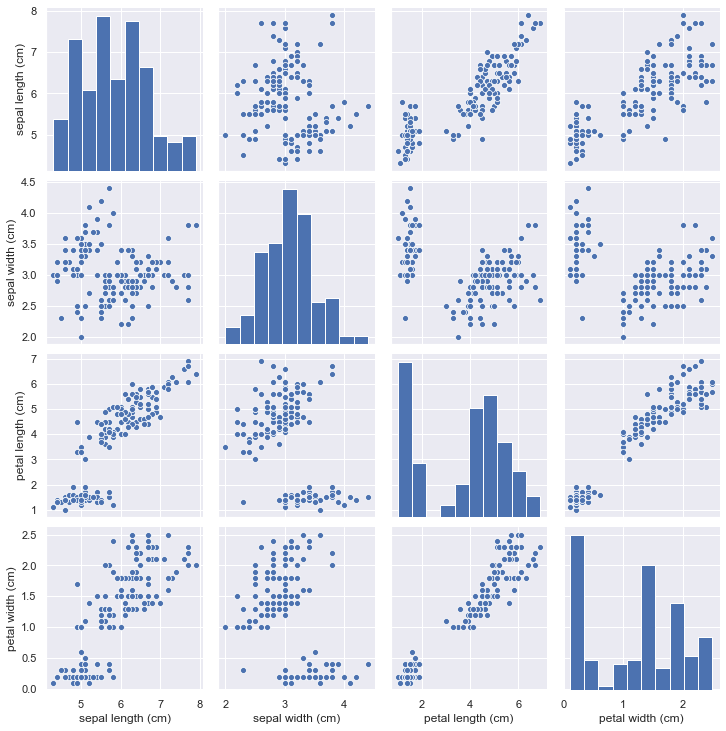

In [7]:
sns.pairplot(df.drop('target',axis=1))

We clearly see the patterns in the data, the collinearity between the petal length and width, the strong correlation between the sepal's length and the petal's length and width to the class.  
In more comlicated datasets I'd make some more histogram and try some feature engineering tricks, but the iris_dataset **really** simple.

##  2. Examining Models

After we understand the data, we may start run some models and then compare between them.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','class'], axis=1), df['target'], 
                                                    test_size=.2, shuffle=True, random_state=5)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


### 2.1 K-Nearest Neighbors

The first and the most basic model is the KNN.  
This model just find the k-closest samples to each test sample, and find the most common class among them.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



The KNN perform pretty well. We may find the best k.  
In order to find it, we shold use GridSearch:

In [10]:
clf = GridSearchCV(KNeighborsClassifier(), param_grid=dict(n_neighbors=range(1,101)))
clf.fit(iris_dataset.data, iris_dataset.target)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101)})

In [11]:
print(clf.best_estimator_)
print(clf.best_score_)

KNeighborsClassifier(n_neighbors=6)
0.9800000000000001


So, for the KNN mehod, we achive 98% success for k=6.

### 2.2 Logistic Regression

The Logistic Regression is a method which find a separation hyperplane of the data.

In [12]:
logit = LogisticRegression(tol=1e-2)
logit.fit(X_train, y_train)

y_pred_logit = logit.predict(X_test)
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



The logistic regression achive 97%, better than the non-optimal KNN, but worse than the optimal

###  2.3 LDA

To be honest, I haven't heard about real applications use the LDA or the QDA, but I'll introduce those methods because the ISLR wrote about that.

So what is LDA?  
LDA is a statistic approach to classify data, by assuming linear seperation of the data. (like strict version of logit)  
The LDA assume the classes drawn from multivarient Gaussian distribution.  
In addition, to ease the inference, the LDA assume that all the classes distributed with the **same** covariance matrix. 

In [22]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



Ok, not so close the best KNN or logit performs. Let's check the QDA:

### 2.4 QDA

The QDA method is a generalization of the LDA.  
Instead of assuming same covariance over the classes, the QDA estimate the covariance for each class.

In [24]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



And the same for the LDA.

## 3. Summary

We saw different approaches for the traditional/basic classification problem.  
From all the models we compared, for the "Iris" dataset, the optime KNN (with k=6) got the best score of 98% accuracy.  